<a href="https://colab.research.google.com/github/shubham-bhadouria/Netflix-Movies-and-TV-shows-clustering/blob/main/Netflix_movies_and_TV_show_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

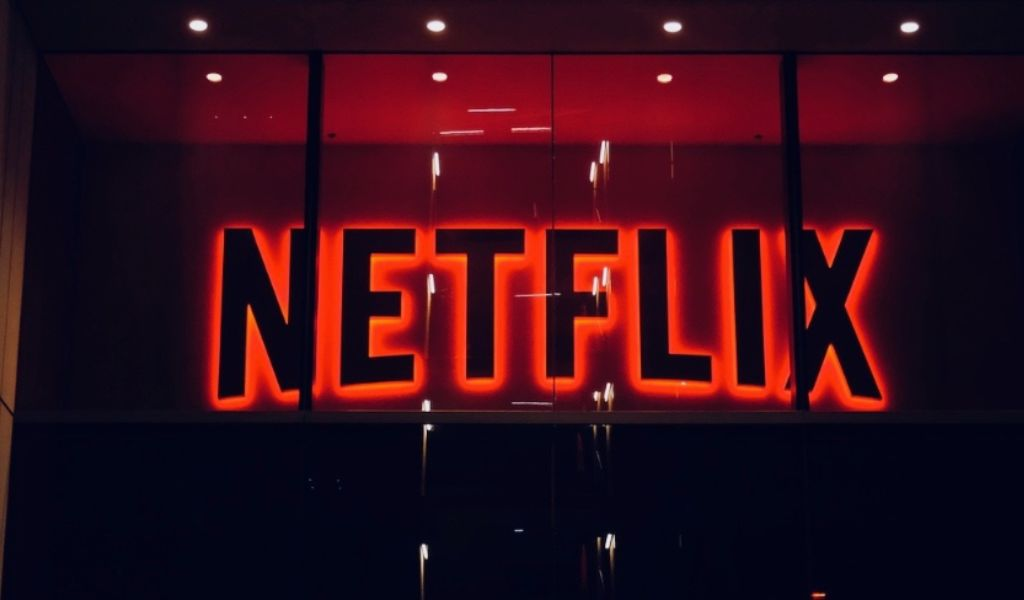

# **In this project, you are required to do**

1.   Exploratory Data Analysis
2.   Understanding what type content is available in different countries
1.   Is Netflix has increasingly focusing on TV rather than movies in recent years
2.   Built a Recommender Systems

# **Attribute Information**

1.   show_id : Unique ID for every Movie / Tv Show
2.   type : Identifier - A Movie or TV Show
1.   title : Title of the Movie / Tv Show
2.   director : Director of the Movie
1.   cast : Actors involved in the movie / show
2.   country : Country where the movie / show was produced
1.   date_added : Date it was added on Netflix
2.   release_year : Actual Releaseyear of the movie / show
1.   rating : TV Rating of the movie / show
2.   duration : Total Duration - in minutes or number of seasons
1.   listed_in : Genere
2.   description: The Summary description












In [2]:
# Importing all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
sns.set_theme(style= 'whitegrid', palette = 'mako')
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from numpy import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
import nltk 
nltk.download('all',quiet=True)
# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

import pylab as pl
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

#stop-words

nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler

# Xplotter
!pip install xplotter --upgrade
from xplotter.insights import *

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Loading the data
Netflix_df = pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING- shubham bhadouria/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

# **Dataset Overview**

In [5]:
#Checking number of rows and columns in our dataset.
print(f' The number of rows are {Netflix_df.shape[0]}')
print(f' The number of columns are {Netflix_df.shape[1]}')

 The number of rows are 7787
 The number of columns are 12


In [6]:
#Name of columns that we have in our dataset 
Netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
#view head of the dataset
Netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [8]:
# View tail of the dataset
Netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


# **Looking for Duplicates and Missing Values**

Last thing to check before moving on, is looking for duplicates and missing values in the dataset. We can use the is_null() function from Pandas to check for any missing data and then use the sum() function to see the total of missing values in each column.

In [9]:
# Checking for duplicate Values in the dataset
Netflix_df.duplicated().sum()

0

There are no duplicate values in our dataset.

In [10]:
#Checking the total null values in each feature
Netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

There are total 2389 missing values in director column, 718 missing values in cast column, 507 missing values in country column, 10 missing values in date_added column and 7 missing values in rating column.

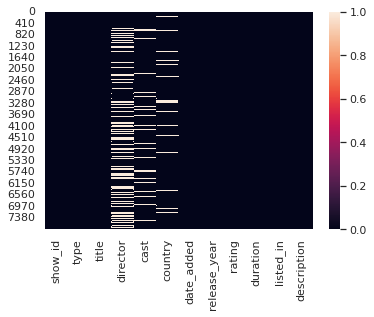

In [11]:
# Heat-map to show null values count
sns.heatmap(Netflix_df.isnull())

In [12]:
# Handling the missing values
Netflix_df['director'].fillna('Unknown',inplace = True)   # replacing null values by unknown
Netflix_df['cast'].fillna('Unknown',inplace = True)       # replacing null values by unknown
Netflix_df['country'].fillna('Unknown',inplace = True)    # replacing null values by unknown
Netflix_df['rating'].fillna(Netflix_df['rating'].mode()[0], inplace = True)       # # replacing null values by mode value
Netflix_df.dropna(axis=0, inplace = True)                 # dropping remaining null values from our dataframe

In [13]:
# Checking the null values after handling missing values
Netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now there are no missing values in our dataset.

# **Descriptive Analysis**
Generally, descriptive analyzes are the first manipulations performed in a quantitative study and their main objective is to summarize and explore the behavior of the data involved in the study.

In [14]:
# data information, It give us non-null values and data type of every column
Netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   rating        7777 non-null   object
 9   duration      7777 non-null   object
 10  listed_in     7777 non-null   object
 11  description   7777 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.9+ KB


**Inference:** No column has null values now and each column is of object type except release_year which is integer type.

In [15]:
 # data information in terms of various statistics values of all the features of or dataset
 Netflix_df.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7777,7777,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7777,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7777,7777,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,7777,4050,Unknown,2379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7777,6822,Unknown,718,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7777,682,United States,2549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7777.0,NaN,NaN,NaN,2013.935965,8.760694,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7777,14,TV-MA,2868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7777,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Feature Creation**
Now, let us extract date_added column and create some useful new features from this date_added feature

In [16]:
Netflix_df["date_added"] = pd.to_datetime(Netflix_df['date_added']) 
Netflix_df['year_added'] = Netflix_df['date_added'].dt.year    ## It will contain the year on which the movie/show has been added
Netflix_df['month_added'] = Netflix_df['date_added'].dt.month   # It will contain the month number instead of characters with January=1, February=2,..and December=12

In [17]:
# Again checking the head of the dataset after creating new features
Netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


# **Exploratory Data Analysis**

# ***Univariate Analysis***

Univariate analysis refers to the analysis of single variable only.

**1. Type ( Whether movie or TV show )**

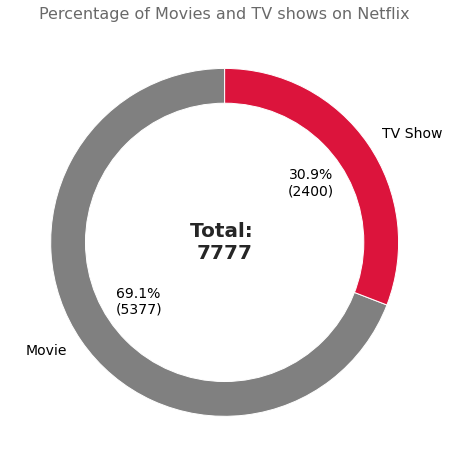

In [18]:
# Percentage of Movies and TV shows listed on netflix
plot_donut_chart(df=Netflix_df, col='type', colors=['gray', 'crimson'],
                 title='Percentage of Movies and TV shows on Netflix')

**Inference**: It is clear that the netflix has more movies than the TV shows in a percentage of 69.1% against 30.9%. Netflix has 5377 movies, which is more than double the quantity of TV shows.

**2. Director**

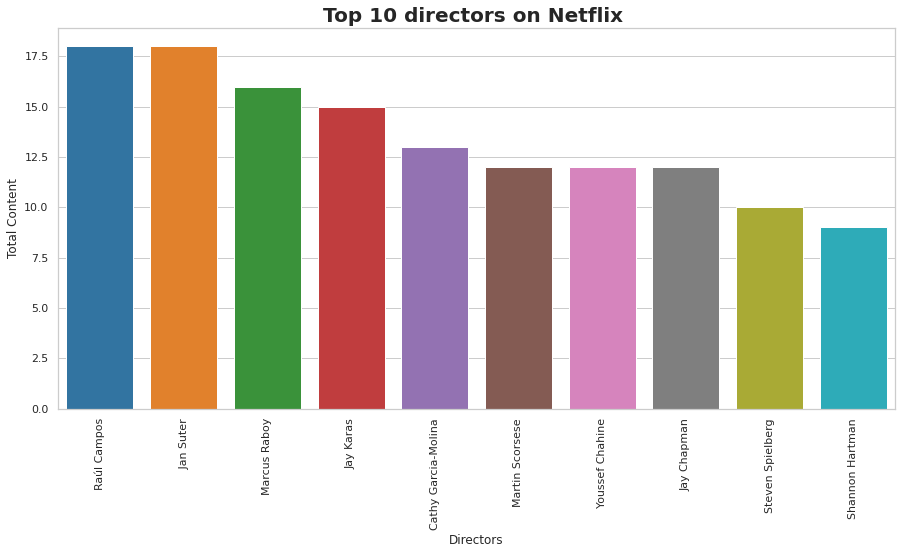

In [19]:
# Top 10 directors on the basis of the total number of shows or movies directed by them in the dataset

Top_directors = pd.DataFrame(Netflix_df['director'].str.split(',', expand = True).stack(), columns=['Directors'])     # creating the dataframe which contains only directors by expanding them as one show/movie can have multiple directors.
Top_directors = Top_directors[~(Top_directors['Directors']=='Unknown')]       # taking only those observations whose directors name are listed in the dataset
plt.subplots(figsize=(15, 7))
sns.barplot(x ='Directors', y ='Total Content', data = Top_directors.groupby(['Directors']).size().reset_index(name = 'Total Content').sort_values("Total Content", ascending=False).head(10), palette ='tab10')
plt.title('Top 10 directors on Netflix ',fontsize = 20,fontweight="bold")
plt.xticks(rotation = 90)
plt.show()

**Inference**: Raul Campos and Jan Suter has directed the most number of movies/Tv shows (total 18 both) followed by Marcus Raboy (total 16).

**3. Cast**

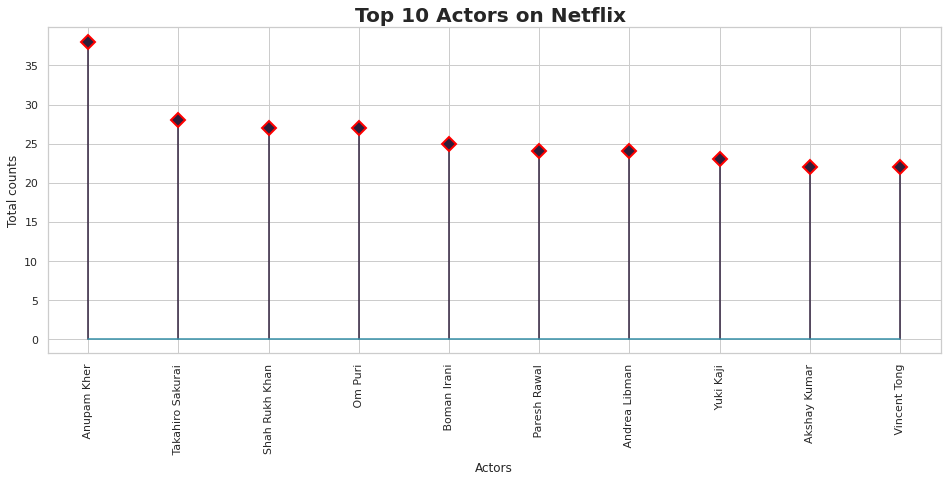

In [20]:
# Top 10 actors on the basis of the total number of shows or movies in which they acted in the dataset

Top_actors = pd.DataFrame(Netflix_df['cast'].str.split(',', expand = True).stack(), columns=['Actors'])     # creating the dataframe which contains only actors by expanding them as each show/movie have multiple actors.
Top_actors = Top_actors[~(Top_actors['Actors']=='Unknown')]       # taking only those observations whose cast details are listed in the dataset
Top_actors = Top_actors.groupby(['Actors']).size().reset_index(name = 'Total Content').sort_values("Total Content", ascending=False).head(10)
x= Top_actors['Actors']
value = Top_actors['Total Content'] 
plt.figure(figsize=(16,6))
(markers, stemlines, baseline) = plt.stem(x, value)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="red", markeredgewidth=2)
plt.title('Top 10 Actors on Netflix ',fontsize = 20,fontweight="bold")
plt.xlabel('Actors')
plt.ylabel('Total counts')
plt.xticks(rotation = 90)
plt.show()

**Inference:** Anupam Kher has acted in the most number of movies/Tv shows (total 38) followed by Takahiro Sakurai (total 28).

**4. Country**

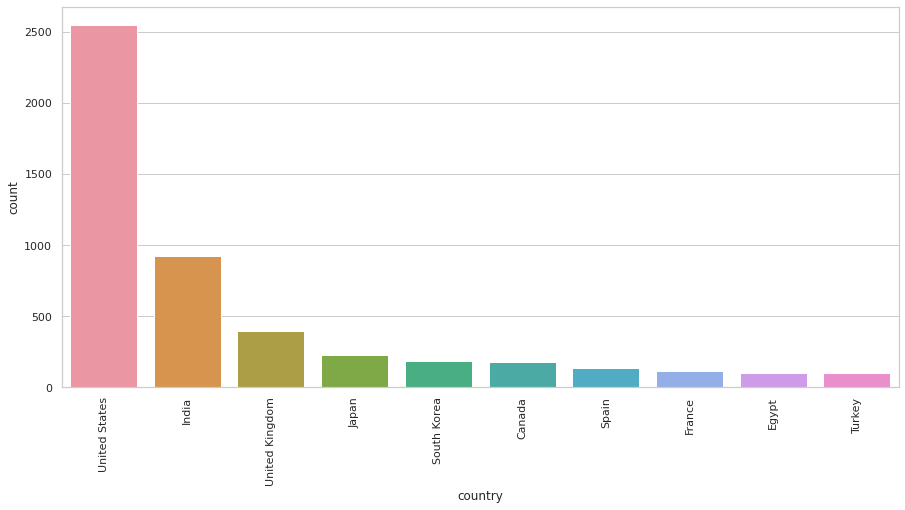

In [21]:
# Top 10 countries where the highest number movies / TV shows was produced in the dataset
plt.subplots(figsize=(15, 7))
sns.countplot(data=Netflix_df, x='country', order= Netflix_df[~(Netflix_df['country']=='Unknown')].country.value_counts().nlargest(10).index)
plt.xticks(rotation = 90)
plt.show()

**Inference:** Most of Movies/TV shows listed on Netflix are produced in United states followed by India.

**5. Rating**

In [22]:
# Distribution of ccontent rating on Netflix

px.pie(Netflix_df.groupby(['rating']).size().reset_index(name='counts'),values= 'counts', names= 'rating',title= 'Distribution of content rating on Netflix')


**Inference:** Most of the Movie/TV shows has TV-MA ratings(36.9%) followed by TV-14(24.8%).

**6. Release year**

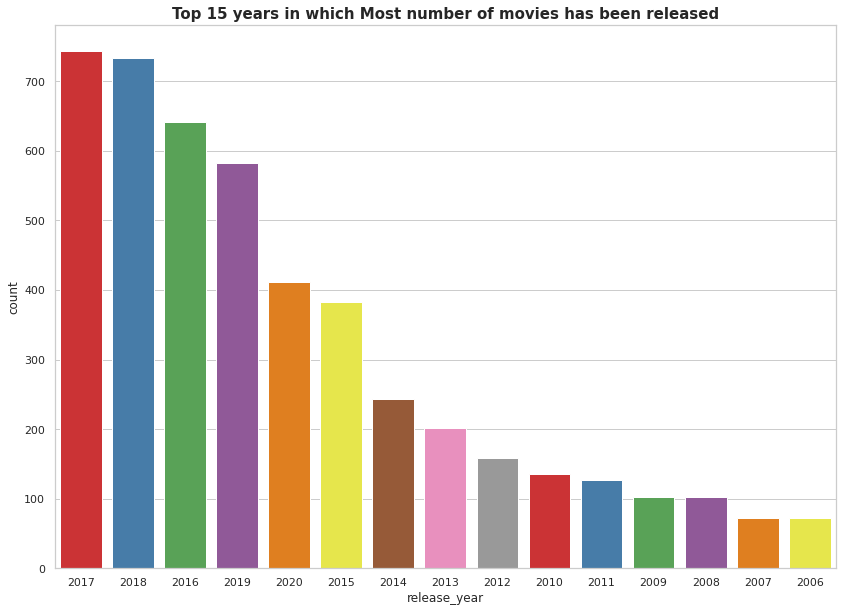

In [23]:
# Top 15 years in which Most number of movies and tv shows has been released
Netflix_movies = Netflix_df[Netflix_df["type"]=="Movie"]       # dataframe containg only movies data
Netflix_shows = Netflix_df[Netflix_df["type"]=="TV Show"]      # dataframe containg only TV shows data

# Top 15 years in which Most number of movies has been released
plt.figure(figsize=(14,10))
sns.countplot(x="release_year", data=Netflix_movies, palette="Set1", order=Netflix_movies['release_year'].value_counts().index[0:15])
plt.title('Top 15 years in which Most number of movies has been released', fontsize=15, fontweight='bold')
plt.show()

**Inference:** Most number of movies has been released in 2017 followed by 2018 and 2016.

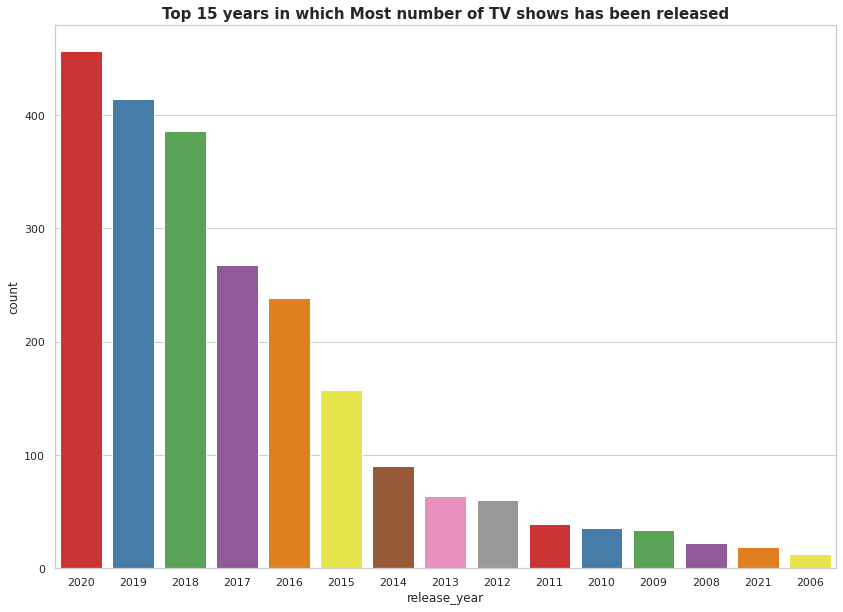

In [24]:
# Top 15 years in which Most number of TV shows has been released
plt.figure(figsize=(14,10))
sns.countplot(x="release_year", data=Netflix_shows, palette="Set1", order=Netflix_shows['release_year'].value_counts().index[0:15])
plt.title('Top 15 years in which Most number of TV shows has been released', fontsize=15, fontweight='bold')
plt.show()

**Inference:** Most number of movies has been released in 2020 followed by 2019 and 2018.

**7. Genres ( listed_in)**

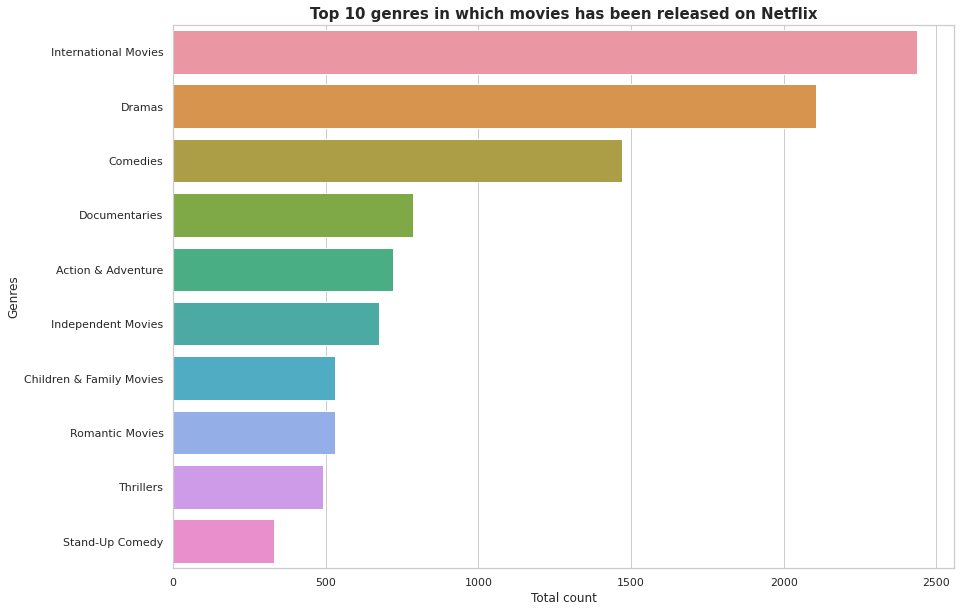

In [25]:
# Top 10 genres in which movies has been released on Netflix
     
Top_movies_genres = Netflix_movies.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)  # creating the dataframe which contains only genres of movies by expanding them as every movie can have multiple genres.
plt.figure(figsize=(14,10))
sns.countplot(y = Top_movies_genres, order=Top_movies_genres.value_counts().index[:10])
plt.title('Top 10 genres in which movies has been released on Netflix', fontsize=15, fontweight='bold')
plt.xlabel('Total count')
plt.ylabel('Genres')
plt.show()


**Inference:** Most of the movies released on netflix are of genre international movies followed by dramas, comedies, documentries and so on.

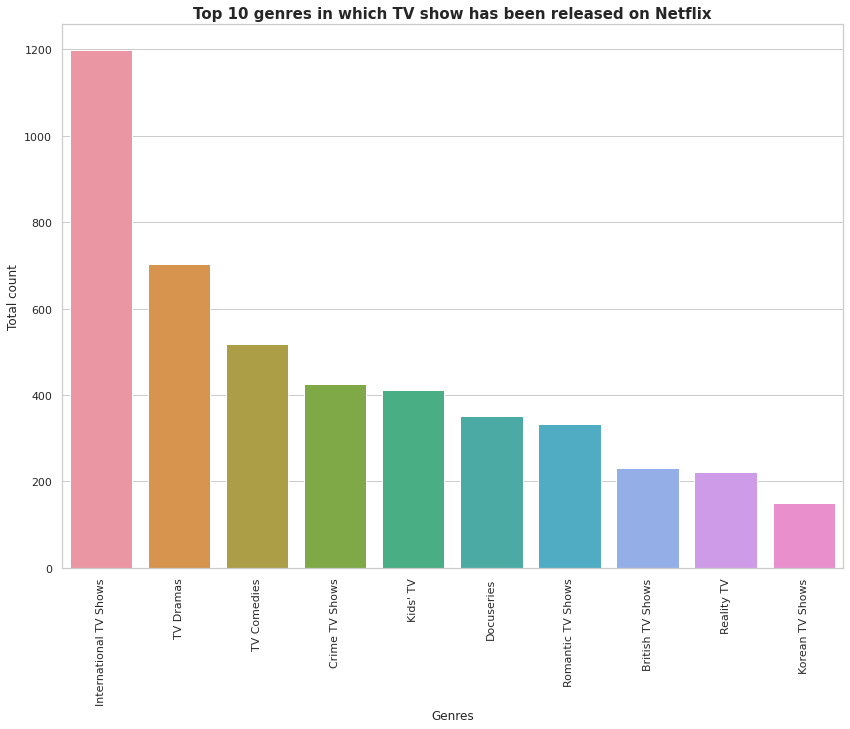

In [26]:
# Top 10 genres in which TV shows has been released on Netflix
     
Top_shows_genres = Netflix_shows.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)  # creating the dataframe which contains only genres of TV shows by expanding them as every TV show can have multiple genres.
plt.figure(figsize=(14,10))
sns.countplot(x = Top_shows_genres, order=Top_shows_genres.value_counts().index[:10])
plt.title('Top 10 genres in which TV show has been released on Netflix', fontsize=15, fontweight='bold')
plt.ylabel('Total count')
plt.xlabel('Genres')
plt.xticks(rotation = 90)
plt.show()

**Inference:** Most of the TV shows released on netflix are of genre international TV shows followed by TV dramas, TV comedies, Crime TV shows and so on.

**8. Month_added ( month in which movie and shows has been added on Netflix)**

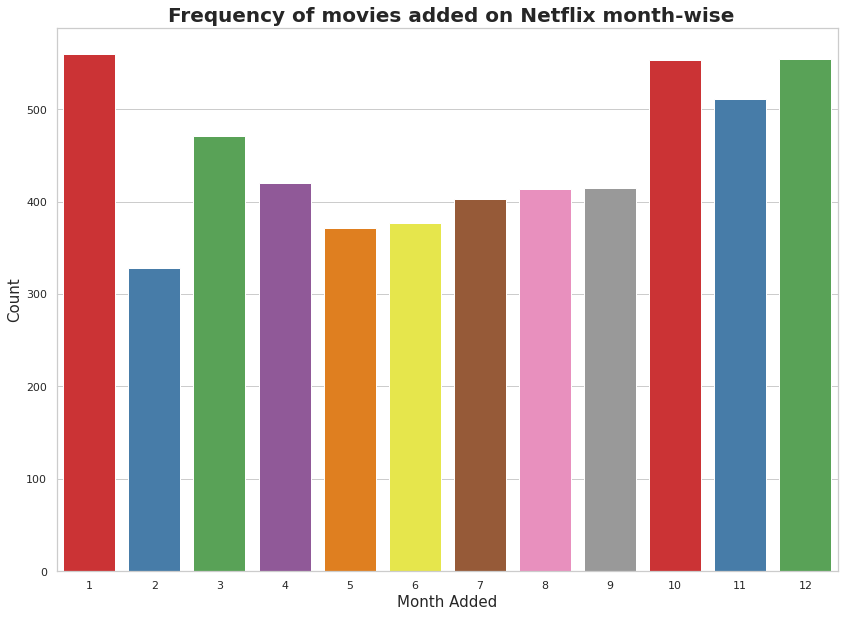

In [27]:
# Frequency of movies added in various months of the different years

plt.figure(figsize=(14,10))
sns.countplot(x='month_added',data= Netflix_movies,palette="Set1")
plt.title(' Frequency of movies added on Netflix month-wise',fontsize = 20,fontweight="bold")  
plt.xlabel('Month Added', fontsize = 15) 
plt.ylabel('Count', fontsize = 15)    
plt.show()

**Inference:** Most of the movies has been added in the month october, november, december and january.

Maximum movies has been added in January and minimum shows has been added in the February.

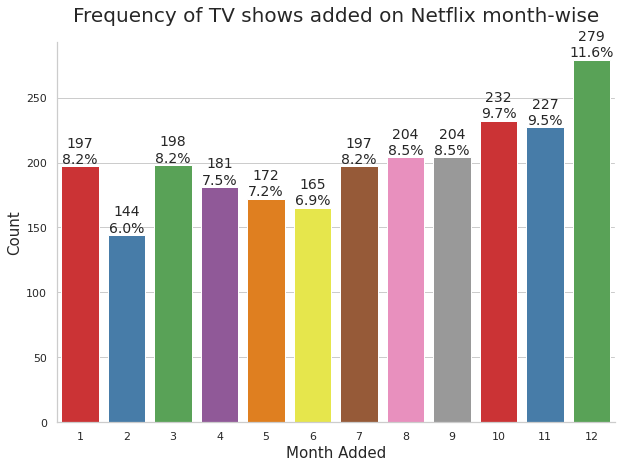

In [28]:
# Frequency of TV shows added in various months of the different years

plt.rcParams["figure.figsize"] = (10,8)
plot_countplot(col='month_added',df= Netflix_shows,palette="Set1",title='Frequency of TV shows added on Netflix month-wise',size_title= 20)  
plt.xlabel('Month Added', fontsize = 15) 
plt.ylabel('Count', fontsize = 15)    
plt.show()

**Inference:** Most of the TV shows has been added in the month of october, november and december. 

Maximum shows has been added in December and minimum shows has been added in the February.

**9. Duration**

In [29]:
Netflix_shows['duration']= Netflix_shows['duration'].str.replace('Season','')      # replacing season by blank space
Netflix_shows['duration']= Netflix_shows['duration'].str.replace('s','')           # replacing s by blank space
Netflix_movies['duration']= Netflix_movies["duration"].str.replace('min','')       # replacing min by blank space

Netflix_movies['duration']= Netflix_movies['duration'].astype(str).astype(int)     # converting duration data type from object to integer type
Netflix_shows['duration']= Netflix_shows['duration'].astype(str).astype(int)       # converting duration data type from object to integer type

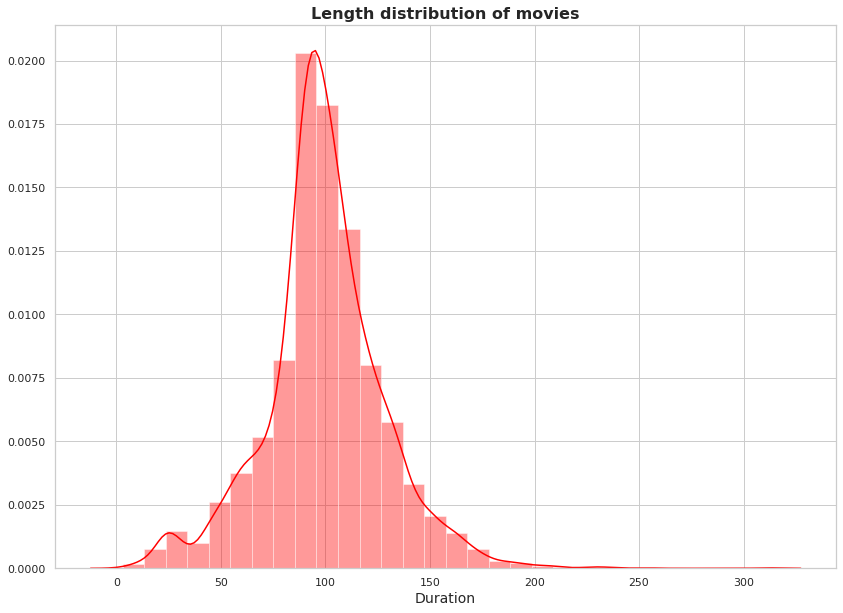

In [30]:
# Length distribution of movies

plt.figure(figsize=(14,10))
sns.distplot(Netflix_movies['duration'], bins=30,color='Red').set(ylabel=None)
plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()

**Inference:** Average duration of movies is between 90 minutes to 120 minutes.

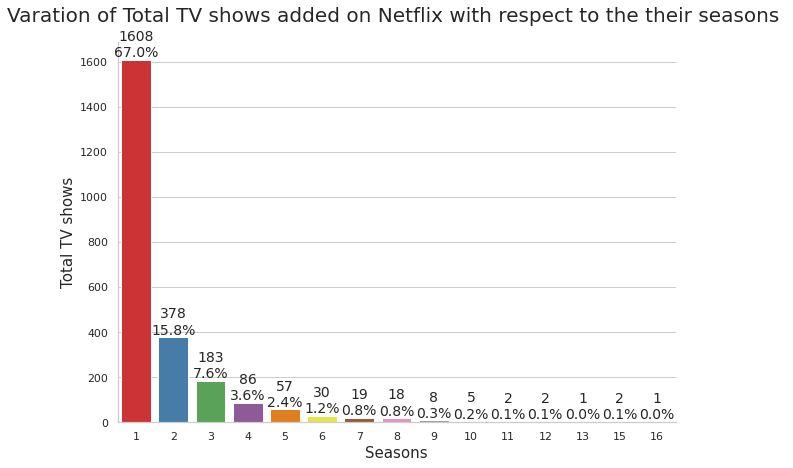

In [31]:
# Varation of Total TV shows added on Netflix with respect to the their seasons

plt.rcParams["figure.figsize"] = (20,15)
plot_countplot(col='duration',df= Netflix_shows,palette="Set1",title='Varation of Total TV shows added on Netflix with respect to the their seasons ', size_title=20)
plt.xlabel('Seasons', fontsize = 15) 
plt.ylabel('Total TV shows', fontsize = 15)    
plt.show()

**Inference:** Most of the TV shows(approximately 1600) added on Netflix has only 1 season.

# ***Bivariate Analysis***
Bivariate analysis refers to the analysis of two variable simuntaneously.

**1. Number of movies and TV shows added over the years on Netflix**

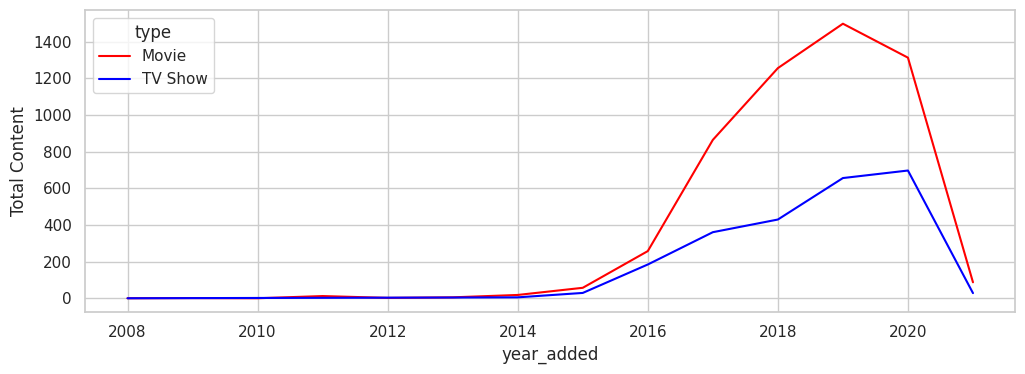

In [32]:
# Number of movies and TV shows added over the years on Netflix

plt.figure(figsize=(12,4), dpi=100)
sns.lineplot(data=Netflix_df.groupby(['type', 'year_added']).size().reset_index(name = 'Total Content').sort_values("year_added", ascending=True), y="Total Content", x="year_added", hue="type", palette=['r', 'b'])
plt.show()

**Inference:**   The number of movies and TV shows added on Netflix has been increasing significantly(almost exponentially) from 2015 to 2019 and after 2019, the number of movies and TV shows added on Netflix has been decreasing significantly due to Covid-19 pandemic.

In 2019, maximum number of TV shows(total 656 shows) and movies(total 1497 movies) has been added on Netflix.

Increase in the total movies added on Netflix is much higher than the total TV shows added on Netflix.

**2. Total number of movies and TV shows listed on Netflix with specific ratings**

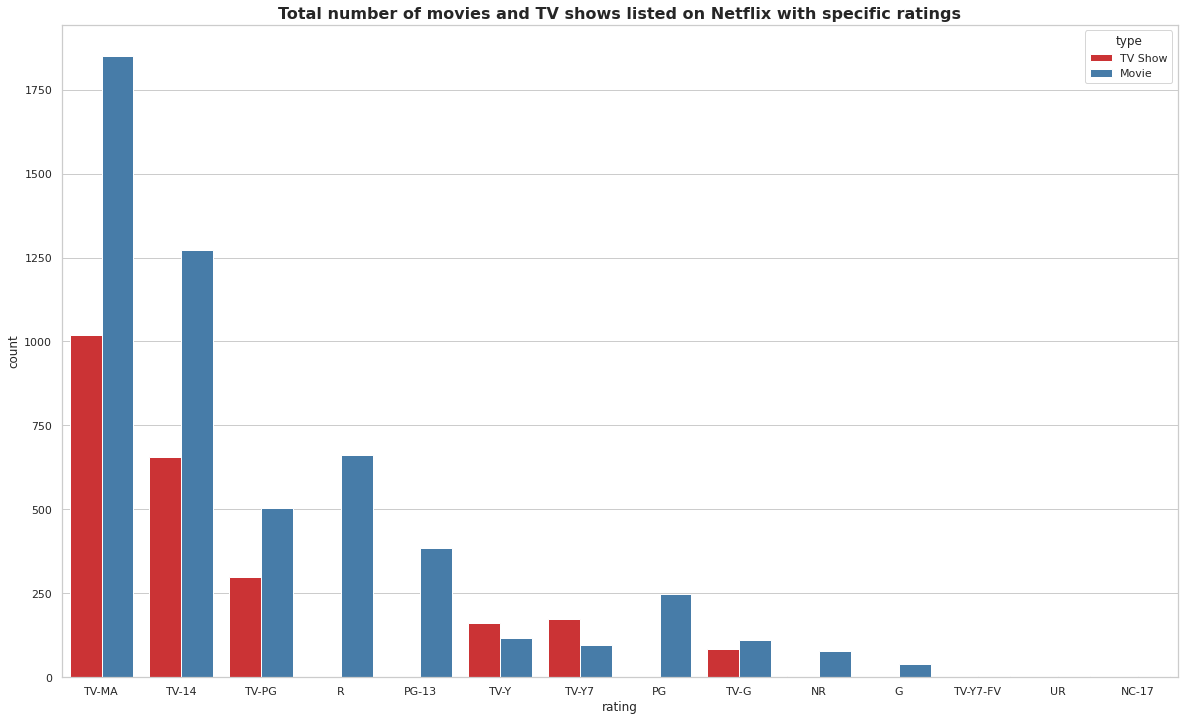

In [33]:
# Total number of movies and TV shows listed on Netflix with specific ratings

plt.figure(figsize=(20,12))
sns.countplot(x='rating',hue='type',data=Netflix_df, order=Netflix_df['rating'].value_counts().index[0:15],palette="Set1")
plt.title('Total number of movies and TV shows listed on Netflix with specific ratings',size='16',fontweight="bold")
plt.show()

**Inference:** Approximately 2800 movies amd 1000 Tv shows has TV-MA ratings respectively. 

Approximately 1250 movies amd 650 Tv shows has TV-14 ratings.

Movies and TV show with UR, NC-17 and TV-Y7-FV ratings are neglible.


**3. Target audience proportion in top 10 countries where the movies/TV shows has been produced.**

In [34]:
#Target audience proportion in top 10 countries where the movies/TV shows has been produced.

# grouping the ratings into various categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

Netflix_df['target_ages'] = Netflix_df['rating'].replace(ratings)        # adding new column 'target_ages' which contains ratings 
Netflix_df['target_ages'] = pd.Categorical(Netflix_df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

netflix = Netflix_df[~(Netflix_df['country']=='Unknown')]                      # dataframe containing only known countries data
Top_10_countries = netflix.country.value_counts()[:10].reset_index()           # containing data of top 10 countries where the movies/Tv shows has been produced


heatmap = netflix.loc[netflix['country'].isin(Top_10_countries['index'])]
heatmap = pd.crosstab(heatmap['country'],heatmap['target_ages'],normalize = "index").T
heatmap


country,Canada,Egypt,France,India,Japan,South Korea,Spain,Turkey,United Kingdom,United States
target_ages,,,,,,,,,,
Kids,0.180791,0.000000,0.095652,0.016251,0.008889,0.027322,0.022388,0.01,0.093434,0.073362
Older Kids,0.225989,0.039604,0.060870,0.160347,0.271111,0.120219,0.044776,0.10,0.204545,0.187132
Teens,0.146893,0.683168,0.165217,0.567714,0.351111,0.382514,0.097015,0.36,0.189394,0.236563
Adults,0.446328,0.277228,0.678261,0.255688,0.368889,0.469945,0.835821,0.53,0.512626,0.502942


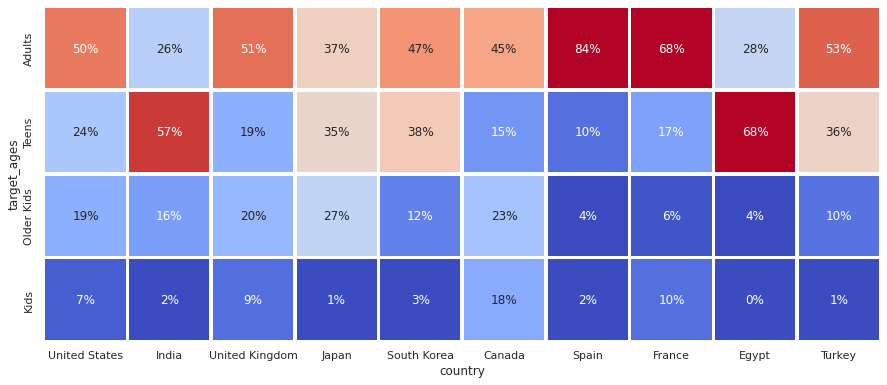

In [35]:
# Plotting the heatmap for finding the target audience proportion in top 10 countries where the movies/TV shows has been produced.
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

country_order = list(Top_10_countries['index'])      # list of top 10 countries where the movies/Tv shows has been produced
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']     # various categories target audience 

sns.heatmap(heatmap.loc[age_order,country_order],cmap="coolwarm",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

**Inference:** The above heat map gives the proportion of audience ages watching movie/TV shows in the top 10 countries.

In USA,
*   50% of movie/TV shows are made for adults
*   24% of movie/TV shows are made for teens 
*   19% of movie/TV shows are made for older 
*   7% of movie/TV shows are made for kids

In India,
*   57% of movie/TV shows are made for teens
*   26% of movie/TV shows are made for adults 
*   16% of movie/TV shows are made for older kids
*   2% of movie/TV shows are made for kids









# **Data Processing and cleaning**

In [36]:
# Creating a dataframe which will contain only text columns to create clusters.
cluster_df = Netflix_df[['title']]            
cluster_df['cluster_data'] = (Netflix_df['cast'] + ' ' + 
                                Netflix_df['director'] +' ' + 
                                Netflix_df['country'] +' ' + 
                                Netflix_df['listed_in'] +' ' + 
                                Netflix_df['description'])
cluster_df.head()

,title,cluster_data
0,3%,"João Miguel, Bianca Comparato, Michel Gomes, R..."
1,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
2,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ..."
3,9,"Elijah Wood, John C. Reilly, Jennifer Connelly..."
4,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar..."


**Removing punctuation marks from the cluster data**

In [37]:
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# Removing punctuation marks
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)       # removing the punctuations from cluster data
cluster_df.head(2)           # dataset after removing punctuation marks from the cluster_data column

,title,cluster_data
0,3%,João Miguel Bianca Comparato Michel Gomes Rodo...
1,7:19,Demián Bichir Héctor Bonilla Oscar Serrano Aza...


**Removing non ASCII characters from the cluster data**

In [38]:
# function to remove non-ASCII characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    import unicodedata
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# remove non-ascii characters
cluster_df['cluster_data'] = remove_non_ascii(cluster_df['cluster_data'])   # removing the non_ASCII words from cluster data
cluster_df.head(2)           # dataset after removing non-ASCII characters from the cluster_data column

,title,cluster_data
0,3%,Joao Miguel Bianca Comparato Michel Gomes Rodo...
1,7:19,Demian Bichir Hector Bonilla Oscar Serrano Aza...


**Removing stopwords from the cluster data**

In [39]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# function to remove non-ASCII characters
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stopwords)      # removing the stopwords from cluster data
cluster_df.head(2)                                                            # dataset after removing punctuation marks from the cluster_data column

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,cluster_data
0,3%,joao miguel bianca comparato michel gomes rodo...
1,7:19,demian bichir hector bonilla oscar serrano aza...


**Lemmatization**

In [40]:
# create an object of stemming function
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

cluster_df['cluster_data'] = lemmatize_verbs(cluster_df['cluster_data'])      # lemmatising the cluster data
cluster_df.head(2)                                            # dataset after lemmitising the cluster data

,title,cluster_data
0,3%,joao miguel bianca comparato michel gomes rodo...
1,7:19,demian bichir hector bonilla oscar serrano aza...


**Tokenization**

In [41]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()    # reference variable for Class TweetTokenizer

cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(lambda x: tokenizer.tokenize(x))        # tokenising the cluster data
cluster_df.head(2)                                            # dataset after tokenising the cluster data

,title,cluster_data
0,3%,"[joao, miguel, bianca, comparato, michel, gome..."
1,7:19,"[demian, bichir, hector, bonilla, oscar, serra..."


**Vectorisation**

In [42]:
# Tokenization
def tokenizer(text):
  return text

# Using TFIDF vectorizer to vectorize the corpus 
tfidf_vectorisation = TfidfVectorizer(tokenizer=tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
x = tfidf_vectorisation.fit_transform(cluster_df['cluster_data'] )

In [43]:
# Shape of the dataset
print(x.shape)

(7777, 20000)


# **Dimensionality reduction using PCA**

In [89]:
pca = PCA()
pca.fit(x.toarray())

PCA()

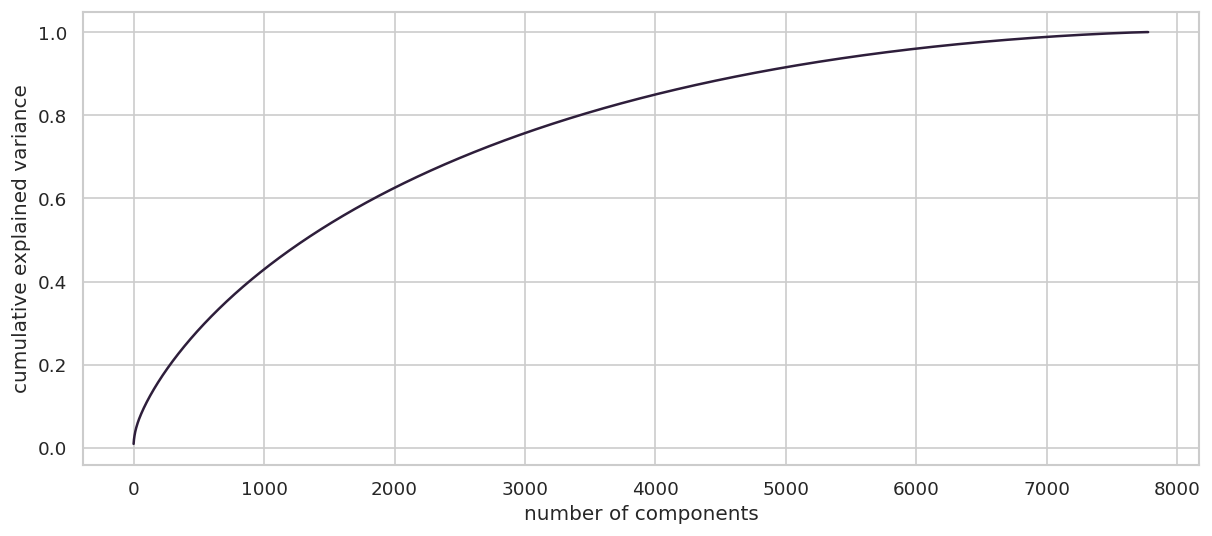

In [91]:
# Plot between variance and number of components
plt.figure(figsize=(12,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**Inference:** 95% of the variance can be explained by 5000 components.

In [44]:
# Reducing the dimensions to 5000 using pca
pca = PCA(n_components=5000)
pca.fit(x.toarray())

PCA(n_components=5000)

In [45]:
# transformed features
x_pca = pca.transform(x.toarray())

# shape of transformed vectors
x_pca.shape

(7777, 5000)

# **Unsupervised Machine Learning clustering algorithms**

# ***1. K-means***


K-means clustering is a distance-based unsupervised clustering algorithm where data points that are close to each other are grouped in a given number of clusters/groups.

Text(0, 0.5, 'WCSS')

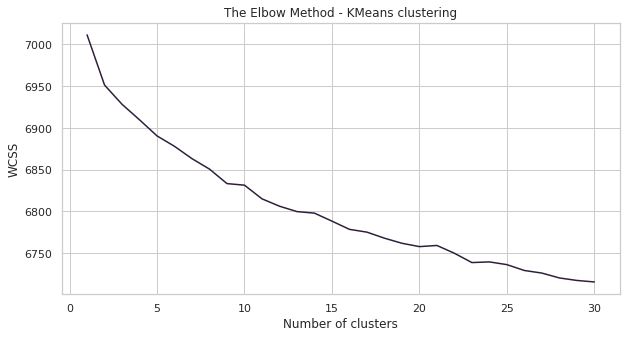

In [95]:
# Elbow method to find the optimal value of k

wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

**Inference:** From the above elbow plot, it is difficult to find the optimum number of clusters but approximate optimum number of cluster can be considered as 9.   

But for more clearity, lets move on to the silhoutee method to find the optimum number of clusters.

In [ ]:
# Silhouette method to find the optimal value of k

from sklearn.metrics import silhouette_score
# Plotting Silhouette score for different number of clusters
n_clusters_range = range(4,21)
silhouette_avg = []
for num_clusters in n_clusters_range:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))


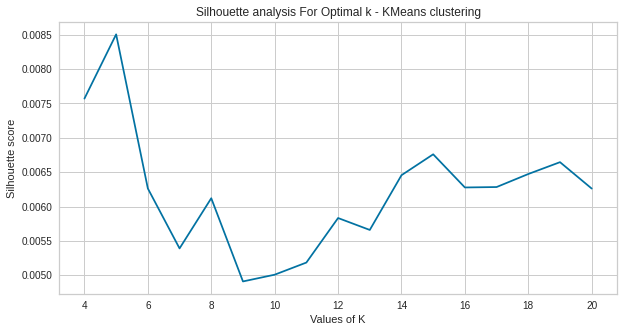

In [55]:
# plotting silhouette score each value of cluster
plt.figure(figsize=(10,5))
plt.plot(n_clusters_range,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [51]:
# Visualisation of clusters with silhouette scores

!pip install yellowbrick
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=42)
      preds = km.fit_predict(x_pca)
      centers = km.cluster_centers_

      score = silhouette_score(x_pca, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(x_pca) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


For n_clusters = 2, silhouette score is 0.005383090525547652


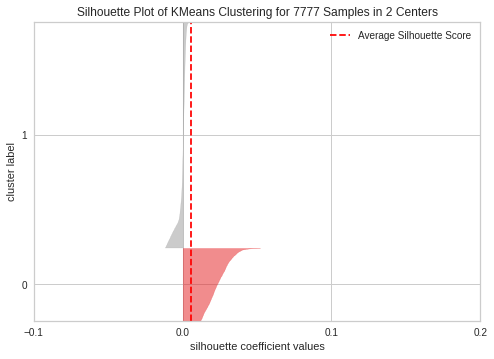

For n_clusters = 3, silhouette score is 0.006298214623211356


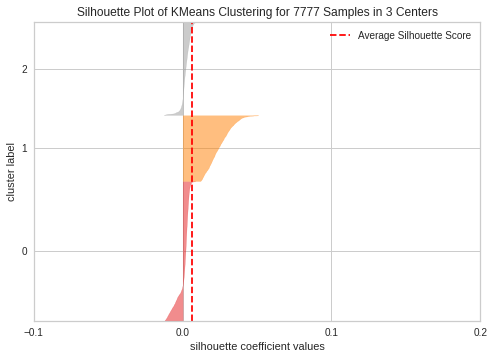

For n_clusters = 4, silhouette score is 0.0066640001868794605


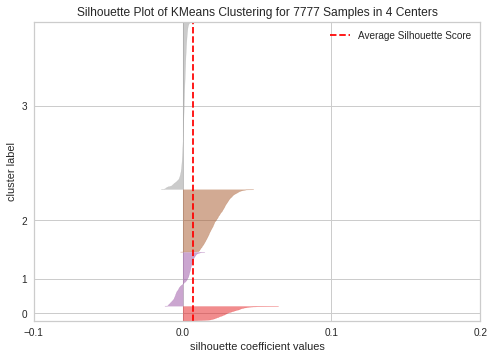

For n_clusters = 5, silhouette score is 0.0018309117661715895


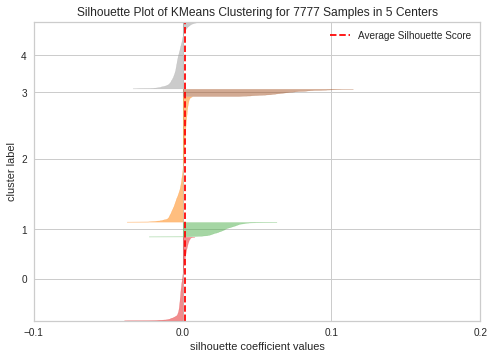

For n_clusters = 6, silhouette score is 0.006308765025025031


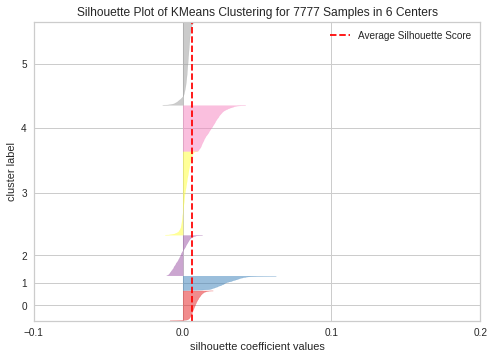

For n_clusters = 7, silhouette score is 0.007066457917101405


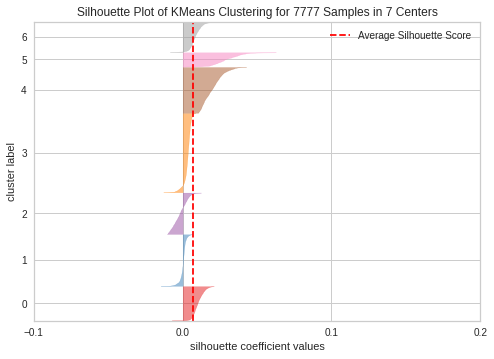

For n_clusters = 8, silhouette score is 0.0043026167279935825


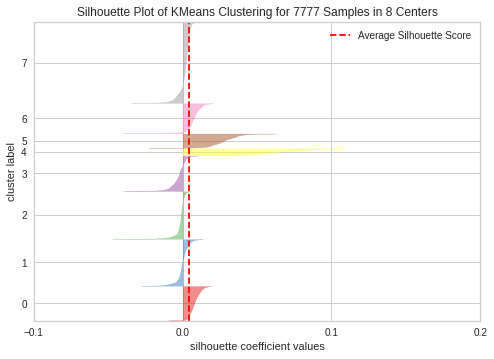

For n_clusters = 9, silhouette score is 0.006245540833936832


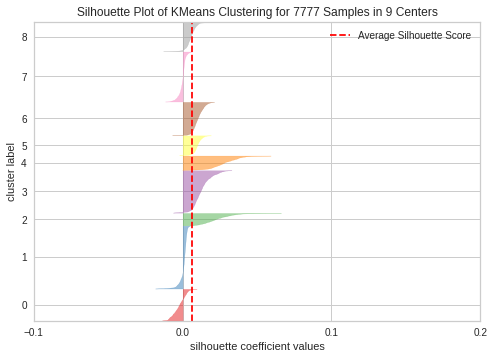

For n_clusters = 10, silhouette score is 0.00502474090704835


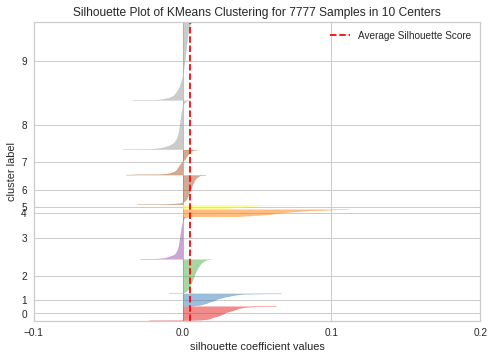

For n_clusters = 11, silhouette score is 0.005252196899065174


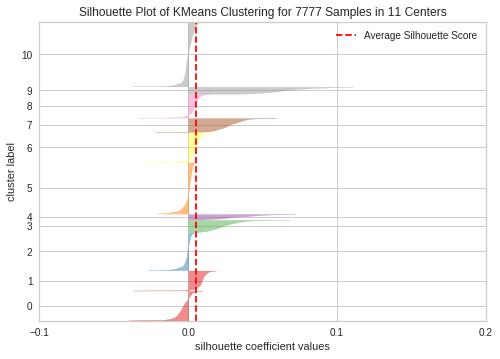

For n_clusters = 12, silhouette score is 0.005911128741193241


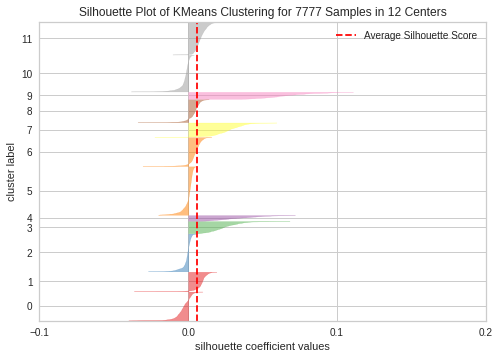

For n_clusters = 13, silhouette score is 0.006169857376520564


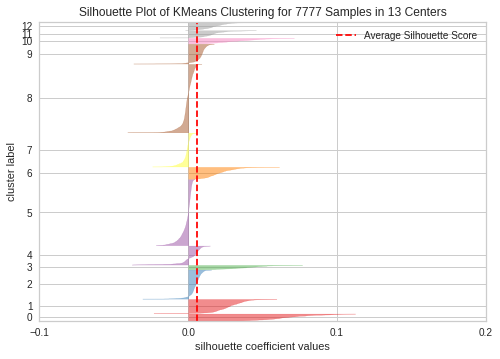

For n_clusters = 14, silhouette score is 0.004540456821670063


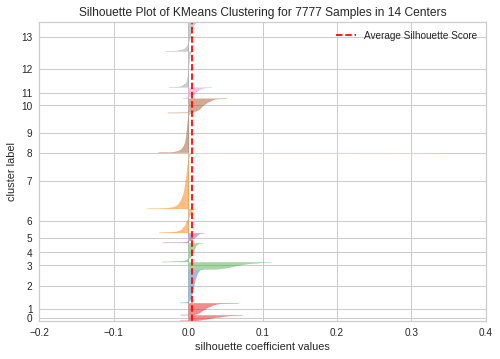

For n_clusters = 15, silhouette score is 0.005752492858210358


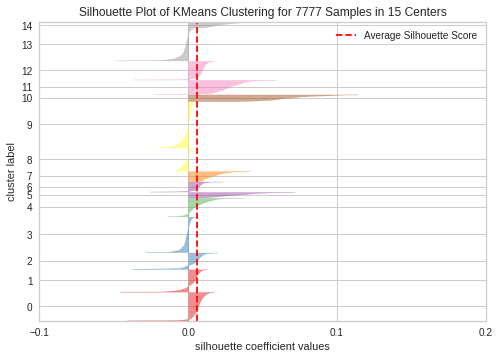

For n_clusters = 16, silhouette score is 0.00588788846368947


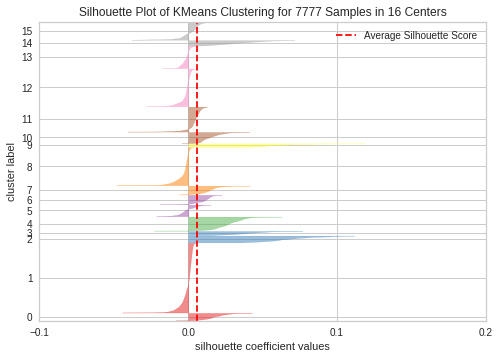

For n_clusters = 17, silhouette score is 0.006473489464551769


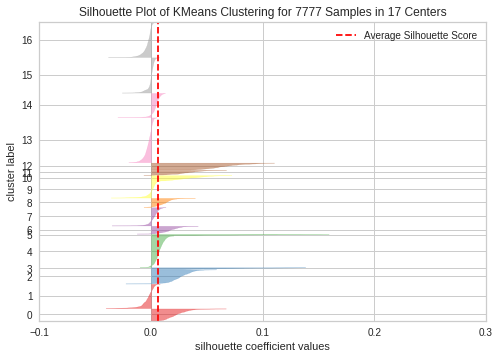

For n_clusters = 18, silhouette score is 0.005016933738425445


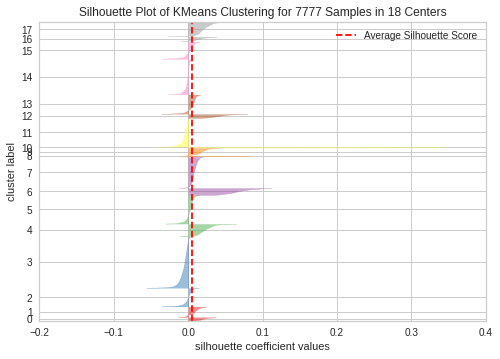

For n_clusters = 19, silhouette score is 0.006287944275300267


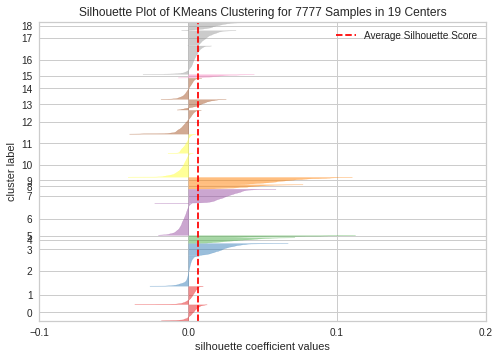

For n_clusters = 20, silhouette score is 0.006774645784915568


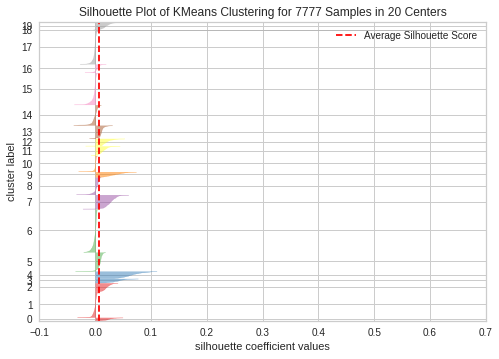

For n_clusters = 21, silhouette score is 0.00524496278544863


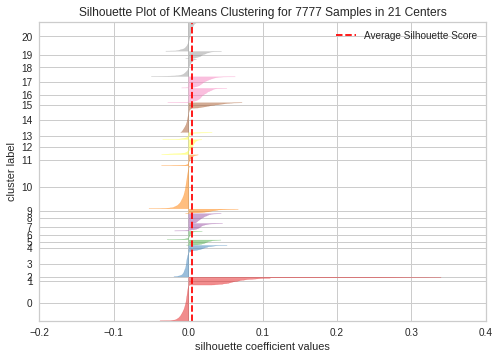

For n_clusters = 22, silhouette score is 0.006928014006934792


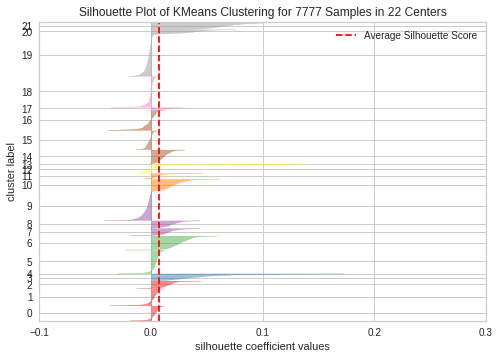

For n_clusters = 23, silhouette score is 0.006894890093447091


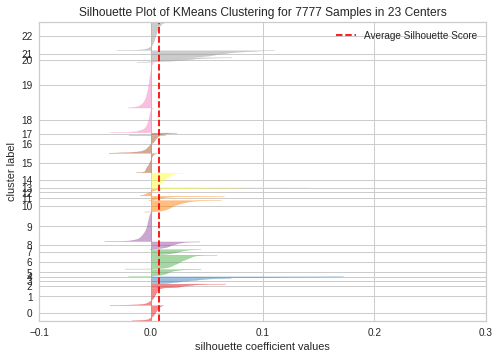

For n_clusters = 24, silhouette score is 0.0069241728814514875


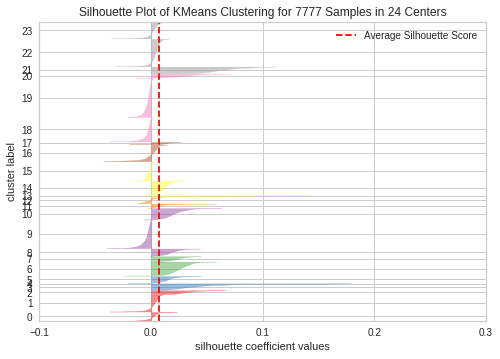

For n_clusters = 25, silhouette score is 0.006154315153167949


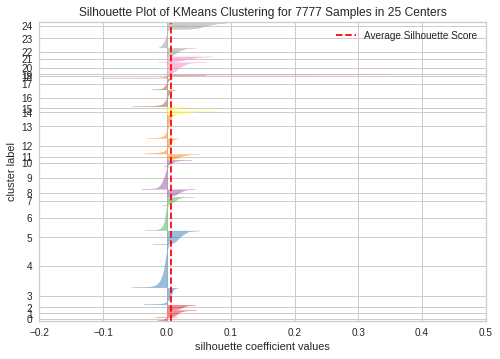

For n_clusters = 26, silhouette score is 0.005402024938149981


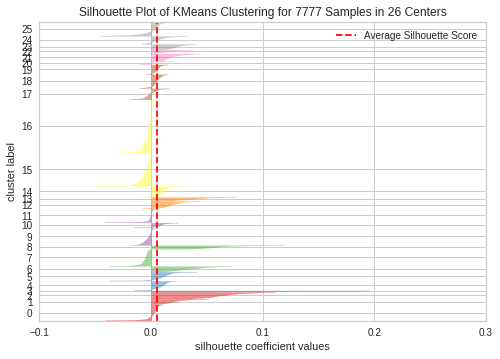

For n_clusters = 27, silhouette score is 0.005448143309370714


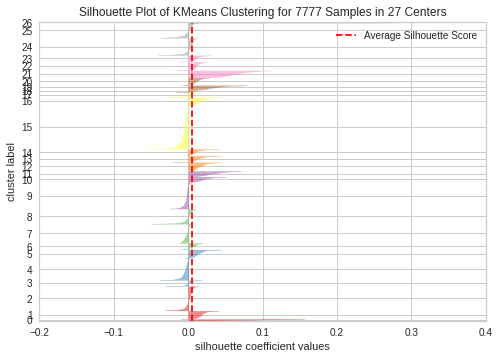

For n_clusters = 28, silhouette score is 0.006194590249589247


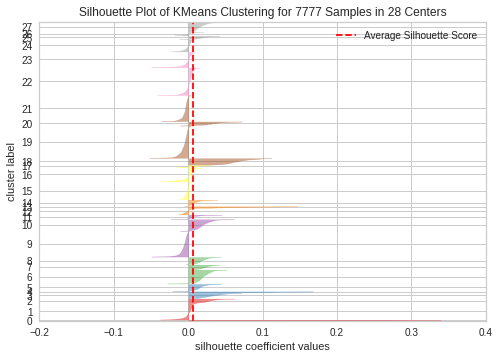

For n_clusters = 29, silhouette score is 0.006067105096671302


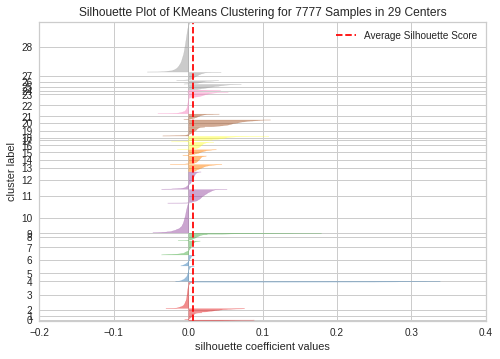

For n_clusters = 30, silhouette score is 0.005762498377062756


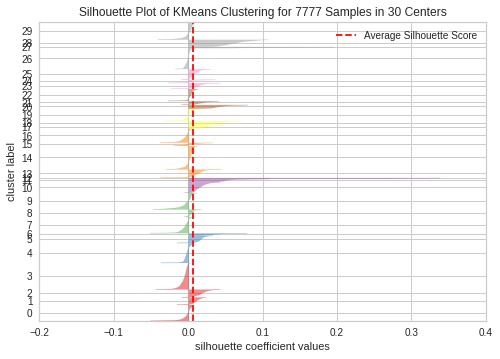

In [52]:
silhouette_score_analysis(31)                # give silhouette score for each cluster

**Inference:** For K=9, all the clusters have a Silhouette score more than the average score of the dataset and  there is not much fluctuations in the size of the clusters. So, the Silhouette plot approach gives us K = 9 as the optimal value.

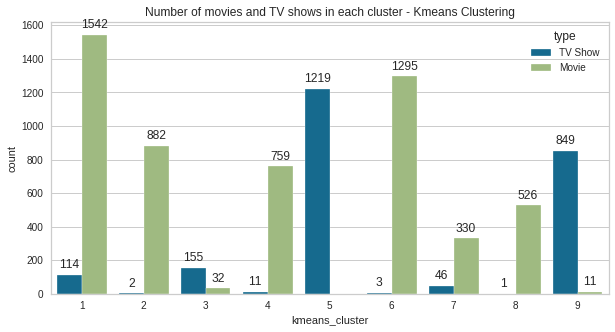

In [62]:
# Number of movies and TV shows in each cluster
cluster_df[['type']] = Netflix_df[['type']] 
kmeans = KMeans(n_clusters=9,init='k-means++',random_state=40)    # Clustering the data into 9 clusters
kmeans.fit(x_pca)

cluster_df['kmeans_cluster'] = kmeans.labels_  + 1      # Adding a kmeans cluster number attribute

# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=cluster_df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Inference**: The above graph shows number of movies and shows in each cluster.

In [68]:
# Building a wordcloud for the movie descriptions
Netflix_df['cluster_number'] = kmeans.labels_      # Add cluster values to the dateframe.

#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [69]:
# Function for creating the word cloud for user rating review

def func_select_Category(category_name,column_of_choice):
  df_word_cloud = Netflix_df[['cluster_number',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Plot the wordclouds
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster: {i+1}')
  plt.axis("off")
  plt.show()

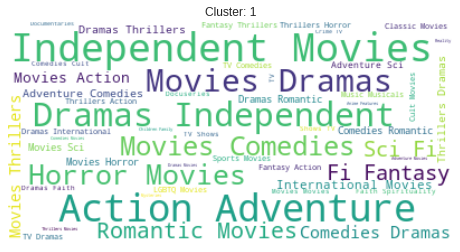

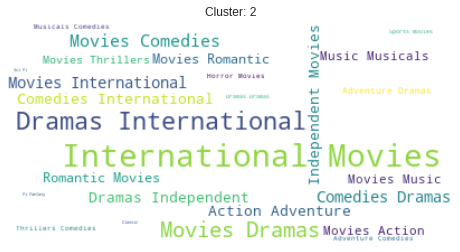

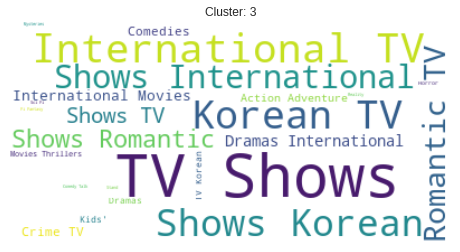

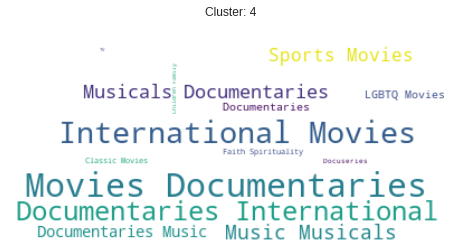

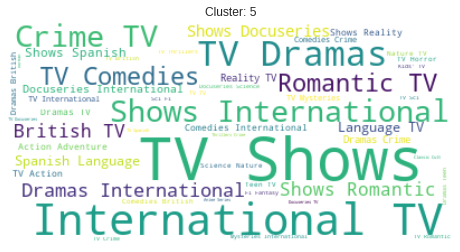

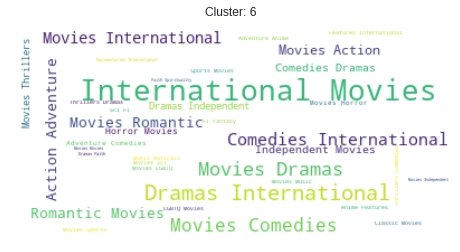

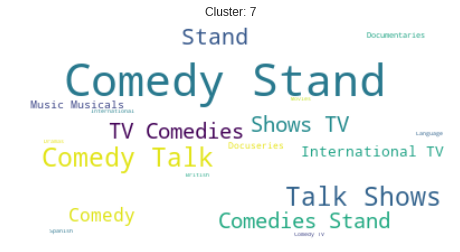

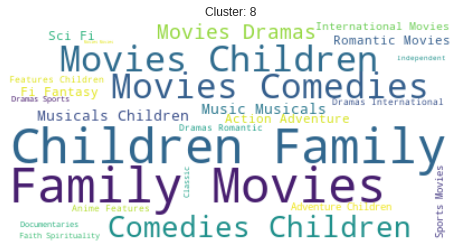

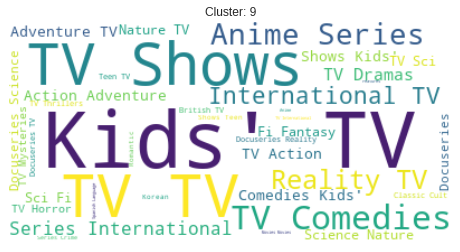

In [70]:
for i in range(9):
  func_select_Category(i,'listed_in')